<h3 align="center">SERIES DE TIEMPO - TRABAJO FINAL</h3>

****
$Integrantes$
* Juan Diego Ariza Sanchez
* Juan Pablo Velázquez
* Karen Nieto Pérez
* Nathalia Gómez Romero
****

El *trafico web* son todas las visitas que llegan a un sitio web, el cual es medido para ver la popularidad de paginas web en específico. Analizando las estadísticas es posible determinar mejoras a la página para dar un mayor alcance a los contenidos, entre otras ventajas.   

El objetivo de este proyecto es pronosticar el tráfico web futuro para el artículo de Wikipedia 'Teorema de Pitágoras'.   

El conjunto de datos de consta de una serie de tiempo que representa la cantidad de vistas diarias de el artículo de Wikipedia antes mencionado, desde el 1 de julio de 2015 hasta el 10 de septiembre de 2017. 

## ANALISIS DESCRIPTIVO

**Cargar ibrerías:**   
Primero cargaremos las librerías necesarias para la realización de este proyecto.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt
import scipy as sp
import scipy.stats

**Procesar datos:**    
Importaremos la base de datos y la convertiremos al formato de una serie de tiempo.


In [4]:
#IMPORTACION DE LA BASE DE DATOS PARA ESTE EJERCICIO
data = pd.read_excel("C:/Users/Nathalia Gomez/Documents/PREGRADO ESTADISTICA/SERIES_DE_TIEMPO/WebTraffic/data/pitagoras.xlsx")
print(data)
#Convertir el conjunto de datos en una serie de tiempo
data['date'] = pd.to_datetime(data['date'])
indice = data.set_index('date')
ts = indice['views']
#Establecer frecuencia del índice
indice.index.freq='D'
ts.index.freq='D'
print(data)

          date  views
0   2015-07-01   4701
1   2015-07-02   6333
2   2015-07-03   3625
3   2015-07-04   2133
4   2015-07-05   2530
..         ...    ...
798 2017-09-06   4069
799 2017-09-07   3816
800 2017-09-08   2936
801 2017-09-09   1906
802 2017-09-10   2575

[803 rows x 2 columns]
          date  views
0   2015-07-01   4701
1   2015-07-02   6333
2   2015-07-03   3625
3   2015-07-04   2133
4   2015-07-05   2530
..         ...    ...
798 2017-09-06   4069
799 2017-09-07   3816
800 2017-09-08   2936
801 2017-09-09   1906
802 2017-09-10   2575

[803 rows x 2 columns]


**Gráficos de la serie de tiempo:**  
Para realizar el análisis descriptivo se realizó el siguiente gráfico de la serie de tiempo completa del número de visitas al artículo de Wikipedia *Teorema de Pitágoras*. Para ver mejor el comportamiento del ciclo acercamos esta serie de tiempo a algunos meses los cuales se eligieron aleatoriamente, como se muestra a continuación:

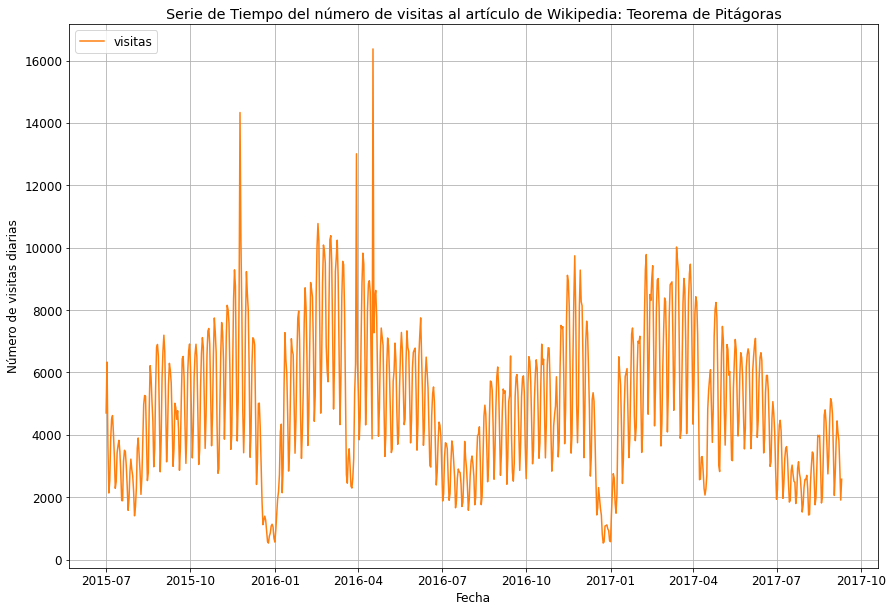

In [5]:
#Grafica de la Serie original
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(14.5, 10))

ax.plot(ts, color='tab:orange', label='visitas')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de visitas diarias')
ax.set_title('Serie de Tiempo del número de visitas al artículo de Wikipedia: Teorema de Pitágoras')
ax.grid(True)
ax.legend(loc='upper left');

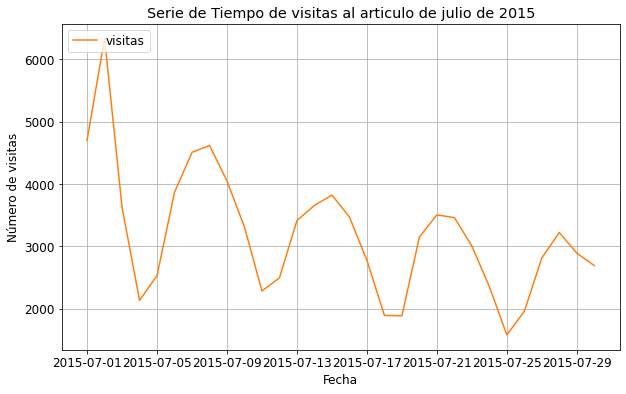

In [6]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ts[0:30], color='tab:orange', label='visitas')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de visitas')
ax.set_title('Serie de Tiempo de visitas al articulo de julio de 2015')
ax.grid(True)
ax.legend(loc='upper left');

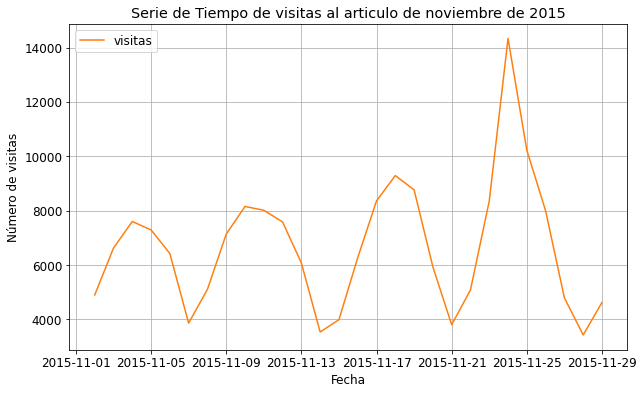

In [7]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ts[124:152], color='tab:orange', label='visitas')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de visitas')
ax.set_title('Serie de Tiempo de visitas al articulo de noviembre de 2015')
ax.grid(True)
ax.legend(loc='upper left');

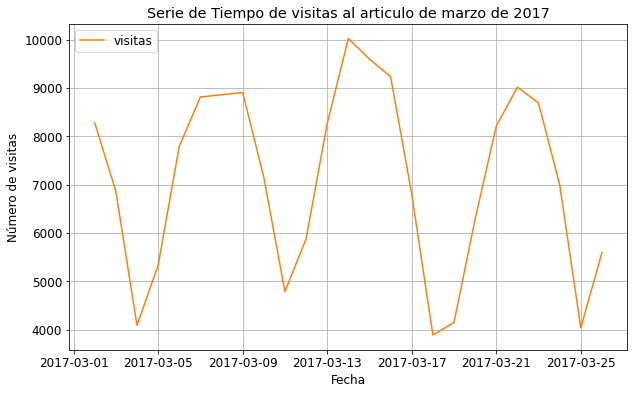

In [8]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ts[610:635], color='tab:orange', label='visitas')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de visitas')
ax.set_title('Serie de Tiempo de visitas al articulo de marzo de 2017')
ax.grid(True)
ax.legend(loc='upper left');

Se puede observar que la serie es no estacionaria, pues incumple el supuesto de media constante. Además, esta tendencia no es determinística, por lo cual, se realizará la diferenciación de primer orden con el fin de eliminar dicha tendencia. Sin embargo, por rigorosidad se realizará la eliminación de la tendencia utilizando un modelo de regresión lineal para comprobar que esta tendencia es de caracter probabilistico (no deterministico).     

Por otra parte, se observa que la serie tiene varianza marginal variable, por lo tanto, se realizará la transformación de Box Cox con el objetivo de estabilizarla.

En el gráfico de la serie completa se puede ver un ciclo cada aproximadamente 6 meses, lo que puede indicar que en el periodo de vacaciones escolares, el artículo de Wikipedia *Teorema de Pitágoras* recibe menor cantidad de visitas.   
Además, en los gráficos de la serie por mes, se observa que el artículo en mención es mayormente consultado a la mitad de la semana, y poco consultado los sábados. Estos ciclos mencionados serán verificados con la función de autocorrelación que se hará más adelante.  

**Serie diferenciada:**   
Se realiza la diferenciación de primer orden de la serie de tiempo en estudio, con el fin de eliminar el componente de tendencia y poder llegar a concluciones confiables.

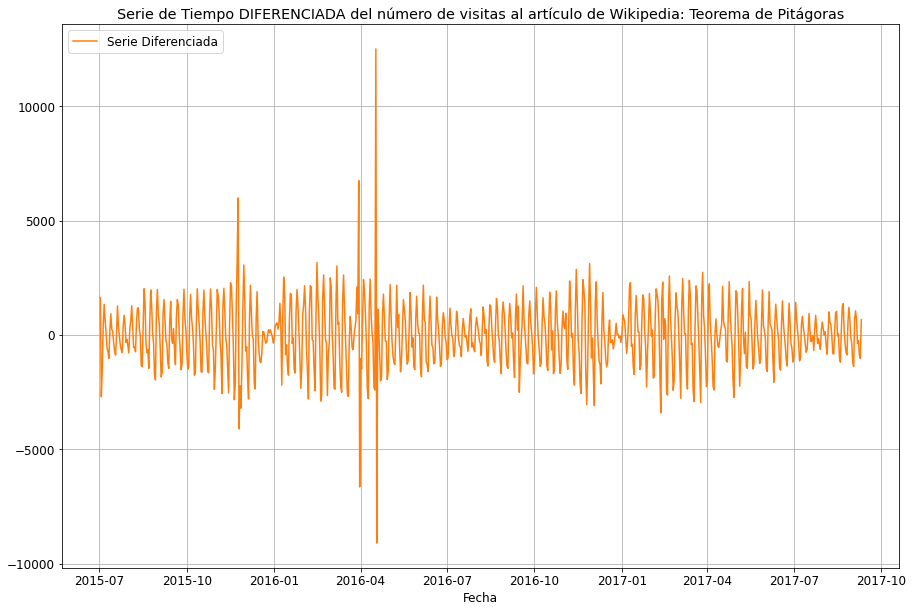

In [21]:
# Serie diferenciada
dif_ts=ts.diff(periods=1)
fig, ax = plt.subplots()
ax.plot(dif_ts, '-', label="Serie Diferenciada", color='tab:orange')
ax.set_xlabel('Fecha')
ax.set_title('Serie de Tiempo DIFERENCIADA del número de visitas al artículo de Wikipedia: Teorema de Pitágoras')
ax.grid(True)
ax.legend(loc='upper left');

**Gráficos de la función de autocorrelación:**  
A continuación se presentan los gráficos de las funciones de autocorrelación para la serie original, la serie sin tendencia lineal y la serie diferenciada.

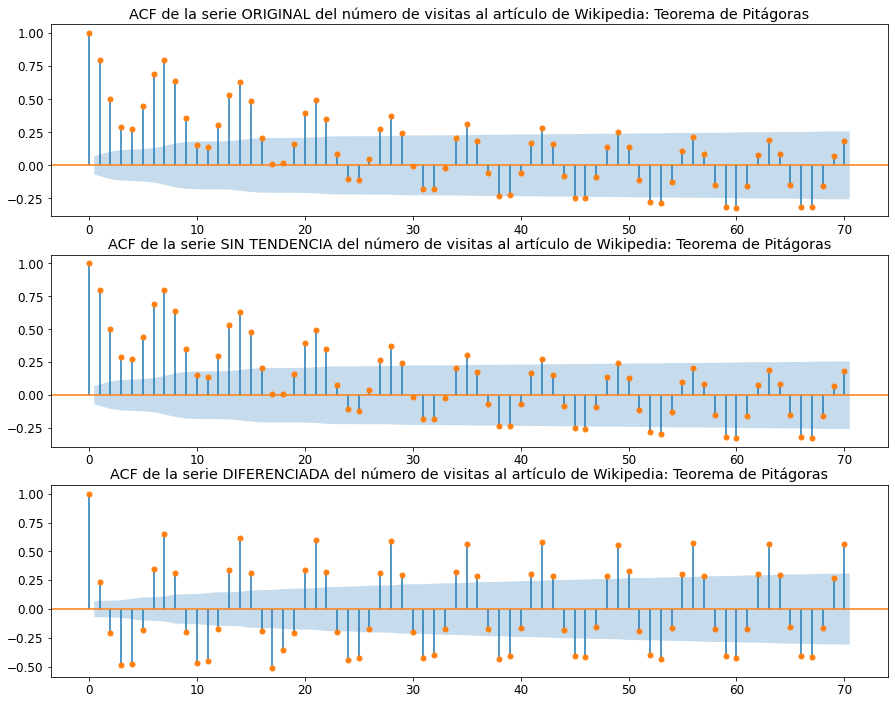

In [23]:
# grafica de la funcion de autocorrelacion de la serie  de hasta 50 rezagos
fig, axes = plt.subplots(3,1,figsize=(15,12)) 
a=plot_acf(ts, lags=70, color='tab:orange',ax=axes[0],title='ACF de la serie ORIGINAL del número de visitas al artículo de Wikipedia: Teorema de Pitágoras')
b=plot_acf(Pitagoras_detrend,color='tab:orange',adjusted=False,lags=70,title='ACF de la serie SIN TENDENCIA del número de visitas al artículo de Wikipedia: Teorema de Pitágoras',ax=axes[1])
c=plot_acf(dif_ts.dropna(),adjusted=False,lags=70,title='ACF de la serie DIFERENCIADA del número de visitas al artículo de Wikipedia: Teorema de Pitágoras',color='tab:orange',ax=axes[2])
plt.show()

Nótese que el ACF de la serie original y el ACF de la serie sin tendencia lineal es idéntico, con lo cual se confirma que la tendencia es de tipo probabilistico, por lo tanto, realizar una regresión lineal para eliminar el componente de tendencia no es apropiado.  Por otro lado, se realizaron 70 retardos para que haya significancia en los ciclos encontrados, por tanto, por medio del ACF no se puede observar algún ciclo semestral.    
En el gráfico del ACF de la serie original los valores caen más lento a cero pero se puede observar presencia de ciclos, por otra parte en el ACF de la serie diferenciada los valores presentan un comportamiento oscilatorio alrededor de cero, lo cual indica la presencia de dichos ciclos, cada 7 días.   

**Periodograma**:
Para reafirmar dónde se encuentra el ciclo, veamos el siguiente periodograma.   
Nótese que el valor máximo está en 0.1421 lo cual indica que el ciclo se encuentra cada 7 días, aproximadamente.

115
0.1432129514321295


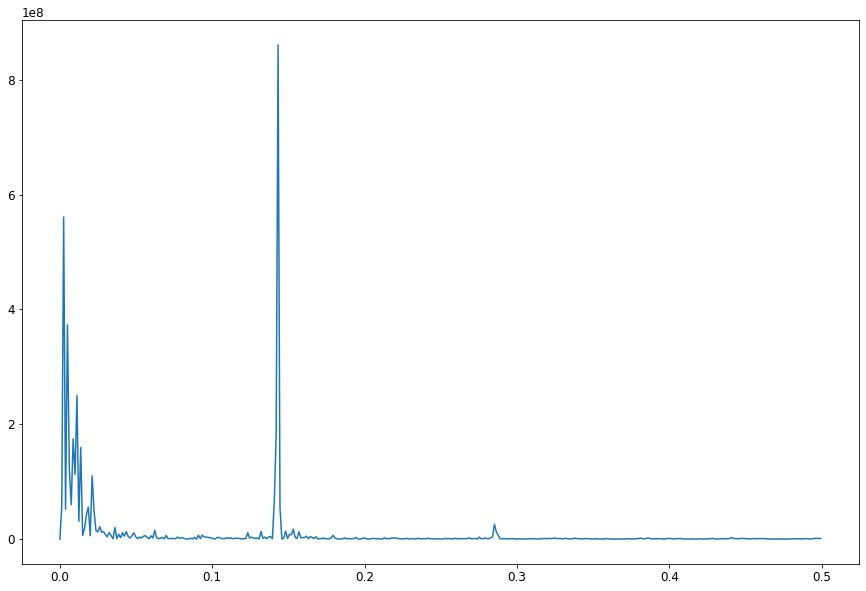

In [24]:
f, Pxx_den=sp.signal.periodogram(ts)
plt.plot(f, Pxx_den)
max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)

**Transformación de Box-Cox para estabilizar la varianza:**   

La serie estudiada también presenta varianza marginal no constante a lo largo del tiempo, lo cual hace necesario tener en cuenta tal característica. 
En este caso, se siguiere hacer una transformación de potencia para estabilizar la varianza. Esta familia de transformaciones se llaman transformaciones Box-Cox.

\begin{equation}
	f_{\lambda}(u_{t})= \begin{cases}
		\lambda^{-1}(u^{\lambda}_{t}-1), &  \text{si  $u_{t} \geq 0$, para $\lambda>0$,}\\
		\ln(u_{t}), &\text{ si $u_{t}>0$, para $\lambda=0$}.
	\end{cases}
	\
\end{equation}


A continuación calcularemos el valor estimado de $\lambda$:

In [25]:
data1 = data
print(sp.stats.boxcox(data1['views'],alpha=0.05)[1])
print(sp.stats.boxcox(data1['views'],alpha=0.05)[2])

0.5728289677887671
(0.46149861911170137, 0.686600607325592)


Como se observa en la salida anterior, se sugiere usar un $\lambda=0.57$ aproximadamente. Y intervalo para $\lambda$ estimado $(0.46, 0.68)$, por tanto, la serie necesita ser transformada para estabilizar su varianza marginal.

<AxesSubplot:xlabel='date'>

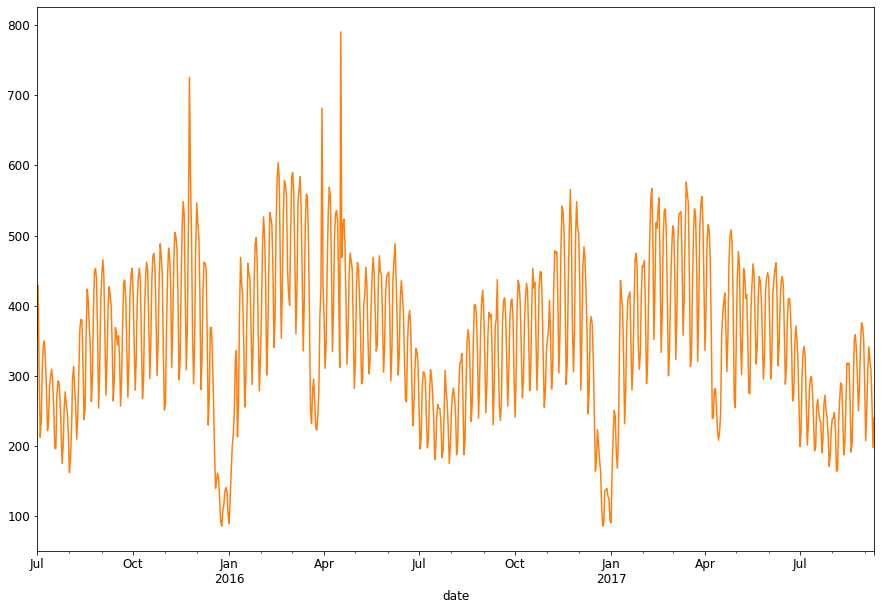

In [26]:
logPITAGORASbx = sp.stats.boxcox(data['views'],lmbda=0.64221)
data = data.assign(logPITAGORASbx=logPITAGORASbx)   
indice2 = data.set_index('date')   
logPIT =  indice2['logPITAGORASbx'] 
#Fijar la frecuencia del índice
logPIT.index.freq='D'
logPIT.plot(color='tab:orange')

Comprobando si esta transformación fue necesaria, se calcula el  $\lambda$ nuevamente como si se le fuera a realizar la transformación de Box Cox a la serie ya transformada. Nótese que el intervalo para $\lambda$ estimado es $(0.71, 1.06)$,el cual contiene al valor 1, por tanto, la serie transformada estabiliza la varianza marginal en gran medida.

In [28]:
sp.stats.boxcox(logPITAGORASbx,alpha=0.05)[2]

(0.7199207094956992, 1.0684504797152283)

**Gráficas de retardos:**    
A continuación se muestra la matriz de gráficos de retardos, de los cuales se puede observar que hay una estructura de correlación más fuerte en los rezagos 1,6,7 y 8. Además están correlacionados positivamente.

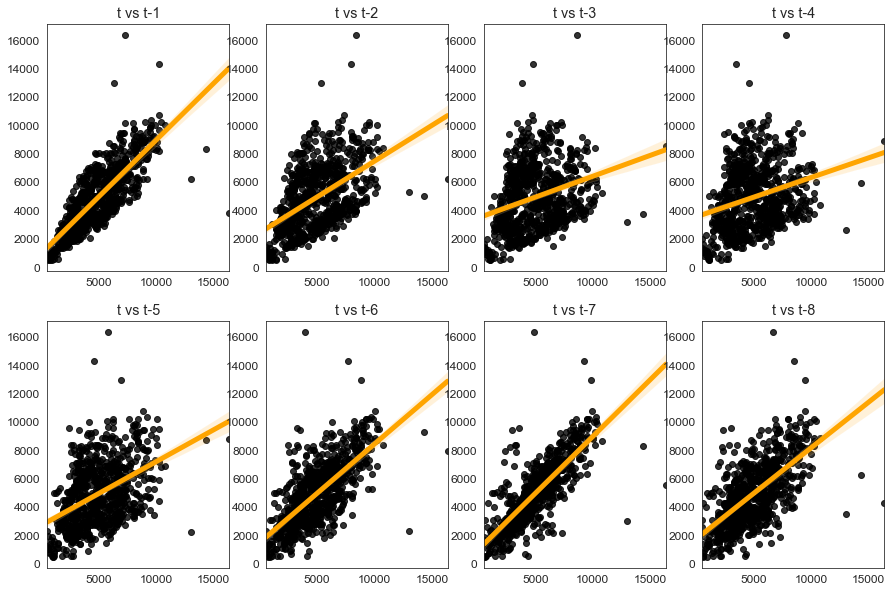

In [29]:
import seaborn as sns
sns.set_style("white")
from pandas.plotting import scatter_matrix
values = pd.DataFrame(ts.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	sns.regplot(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values,color="black", 
            line_kws={"color":"orange", "linewidth":5})
plt.show()

**Promedios y desviaciones estándar por mes:**    
A continuación se muestra los promedios por mes de las visitas al artículo de Wikipedia *Teorema de Pitágoras* y sus respectivas desviaciones estándar, tanto numérica como gráficamente.

In [30]:
d = {'views': ts.values, 'fecha': ts.index,'year':ts.index.year,'mes':ts.index.month_name(), 'dia':ts.index.day}
df = pd.DataFrame(data=d)

In [31]:
# medias mensuales
mediaspormes=df[['views','mes']].groupby(df['mes']).mean()
mediaspormes
nuevo={'Views_promedio': mediaspormes['views'].values,'mes':mediaspormes.index}
df_mediaspormes=pd.DataFrame(data=nuevo)
df_mediaspormes

,Views_promedio,mes
0,5978.400000,April
1,3700.086022,August
2,3390.112903,December
3,7172.701754,February
4,4416.387097,January
5,2859.913978,July
6,5000.116667,June
7,6913.645161,March
8,5566.935484,May
9,6457.483333,November


In [32]:
# Desviaciones estandar mensuales
sdpormes=df[['views','mes']].groupby(df['mes']).std()
sdpormes
nuevo1={'Views_sd': sdpormes['views'].values,'mes':sdpormes.index}
df_sdpormes=pd.DataFrame(data=nuevo1)
df_sdpormes

,Views_sd,mes
0,2561.346906,April
1,1353.913327,August
2,2562.565634,December
3,1958.814401,February
4,2002.597963,January
5,862.049210,July
6,1332.214101,June
7,2536.722683,March
8,1244.144619,May
9,2207.999766,November


In [33]:
#se deben instalar usando pip install sorted-months-weekdays y pip install sort-dataframeby-monthorweek
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

In [34]:
Ordenado_medias=Sort_Dataframeby_Month(df = df_mediaspormes,  monthcolumnname='mes')
Ordenado_medias

,Views_promedio,mes
0,4416.387097,January
1,7172.701754,February
2,6913.645161,March
3,5978.400000,April
4,5566.935484,May
5,5000.116667,June
6,2859.913978,July
7,3700.086022,August
8,4553.271429,September
9,5258.903226,October


In [36]:
Ordenado_sd=Sort_Dataframeby_Month(df = df_sdpormes,  monthcolumnname='mes')
Ordenado_sd

,Views_sd,mes
0,2002.597963,January
1,1958.814401,February
2,2536.722683,March
3,2561.346906,April
4,1244.144619,May
5,1332.214101,June
6,862.049210,July
7,1353.913327,August
8,1350.985211,September
9,1455.410704,October


Text(0, 0.5, 'SD de las vistas por mes')

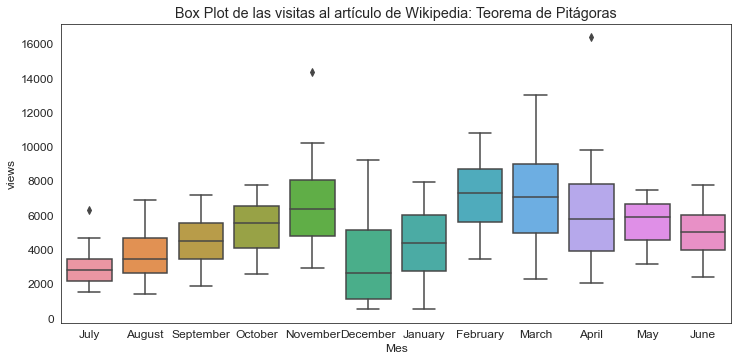

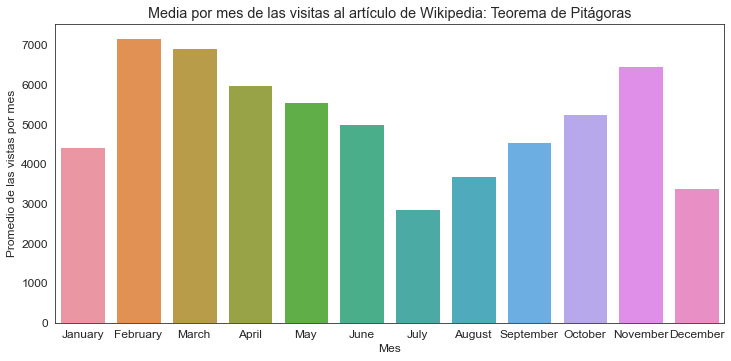

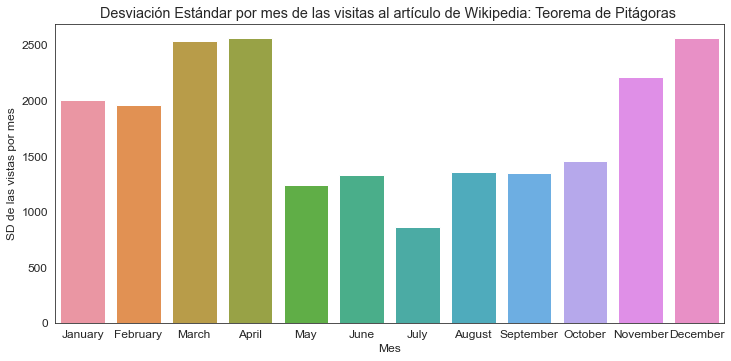

In [37]:
# graficos 
plt.figure(figsize=(12, 5.5))
g = sns.boxplot(data=df, y='views', x='mes')
g.set_title('Box Plot de las visitas al artículo de Wikipedia: Teorema de Pitágoras')
g.set_xlabel('Mes')
g.set_ylabel('views')

plt.figure(figsize=(12, 5.5))
g = sns.barplot(data=Ordenado_medias, y='Views_promedio', x='mes')
g.set_title('Media por mes de las visitas al artículo de Wikipedia: Teorema de Pitágoras')
g.set_xlabel('Mes')
g.set_ylabel('Promedio de las vistas por mes')

plt.figure(figsize=(12, 5.5))
g = sns.barplot(data=Ordenado_sd, y='Views_sd', x='mes')
g.set_title('Desviación Estándar por mes de las visitas al artículo de Wikipedia: Teorema de Pitágoras ')
g.set_xlabel('Mes')
g.set_ylabel('SD de las vistas por mes')

Numérica y graficamente, se observa que hay menor desviación estándar en el mes de julio y mayor desviación estándar en el mes de diciembre, seguido de marzo y abril. Además, el mes con mas visitas al artículo en mención es febrero, seguido de marzo, abril y noviembre. Y los meses en que menos que visita dicho artículo son en enero, julio y diciembre, por lo que se puede pensar que en periodo de vacaciones escolares dicho artículo es de poco interés.

## Modelo 1: Suavizamiento Exponencial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt
import scipy as sp
import scipy.stats

Se trabaja bajo el supuesto que una serie de tiempo observable puede ser descompuesta en una componente de tendencia y una componente estacional, es decir,

$$
X_{t}=m_{t}+S_{t}+Y_{t},
$$
donde 
$$m_{t}:=\text{Tendencia (función que cambia suavemente),}$$
$$S_{t}:\text{Componente estacional (función de periodo conocido d),}$$
$$Y_{t}:\text{Ruido aleatorio estacionario en el sentido débil.}$$

Para estos casos, se asume que $\{X_t\}$ tiene varianza marginal constante a lo largo del tiempo. Por tal razón se trabaja con los datos conseguidos a partir de la transformación Box-Cox. 

Una vez estabilizada la varianza, procedemos a obtener nuestro conjunto de entrenamiento y de validación, usando la regla del 80% y 20% respectivamente.

#### División de los datos en entrenamiento y validación 

In [45]:
tam_train=640                                                            #Tamaño del conjunto de datos 
train , vali = logPIT[0:tam_train] , logPIT[tam_train:len(logPIT)]       #Defino el conjunto de entrenamiento y el de validación
print('Training Observations: %d' % (len(train)))                        #Observo los tamaños de cada conjunto
print('Validation Observations: %d' % (len(vali)))

Training Observations: 640
Validation Observations: 163


Una vez establecidos los dos conjuntos de datos, procedemos a generar el modelo de suavizamiento exponencial con nuestros datos de entrenamiento.

C:\Users\Karen\.conda\envs\Karen\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


Text(0, 0.5, 'resid')

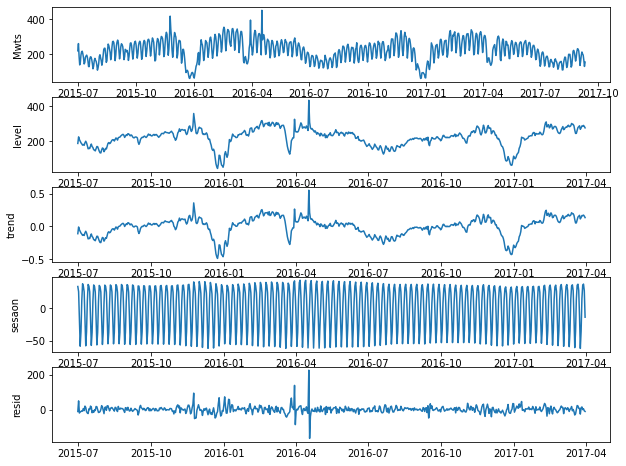

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing

fit_exp = ExponentialSmoothing(train, seasonal_periods=7, trend='add', initialization_method="estimated", seasonal='add').fit(use_boxcox=False)

plt.figure(figsize=(10,8))
plt.subplot(5, 1, 1)
plt.plot(logPIT)
plt.ylabel('Mwts')
plt.subplot(5, 1, 2)
plt.plot(fit_exp .level)
plt.ylabel('level')
plt.subplot(5, 1, 3)
plt.plot(fit_exp .trend)
plt.ylabel('trend')
plt.subplot(5, 1, 4)
plt.plot(fit_exp .season)
plt.ylabel('sesaon')
plt.subplot(5, 1, 5)
plt.plot(fit_exp .resid)
plt.ylabel('resid')

### Parámetros estimados

In [50]:
fit_exp.params_formatted

,name,param,optimized
smoothing_level,alpha,0.760812,True
smoothing_trend,beta,0.002706,True
smoothing_seasonal,gamma,0.046695,True
initial_level,l.0,196.992499,True
initial_trend,b.0,-0.086701,True
initial_seasons.0,s.0,34.452157,True
initial_seasons.1,s.1,23.566872,True
initial_seasons.2,s.2,-16.179263,True
initial_seasons.3,s.3,-58.162568,True
initial_seasons.4,s.4,-35.171470,True


C:\Users\Karen\.conda\envs\Karen\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='date'>

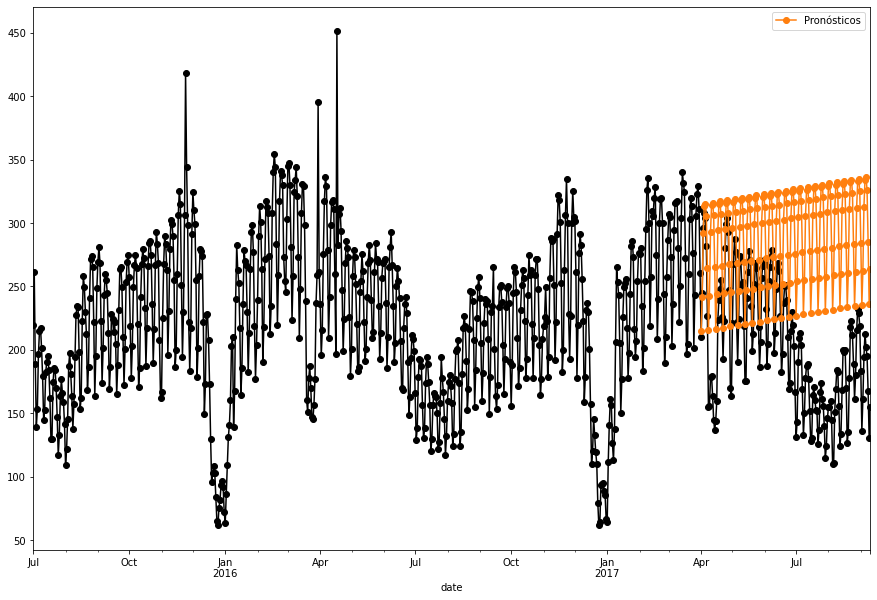

In [51]:
fcast1 = fit_exp.forecast(163).rename("Pronósticos")
ax = logPIT.plot(color="black", marker="o", figsize=(15,10))
fcast1.plot(ax=ax, color='tab:orange', marker="o", legend=True)

Veámos como se comportan estos pronósticos, con nuestra variable en su escala original

<AxesSubplot:xlabel='date'>

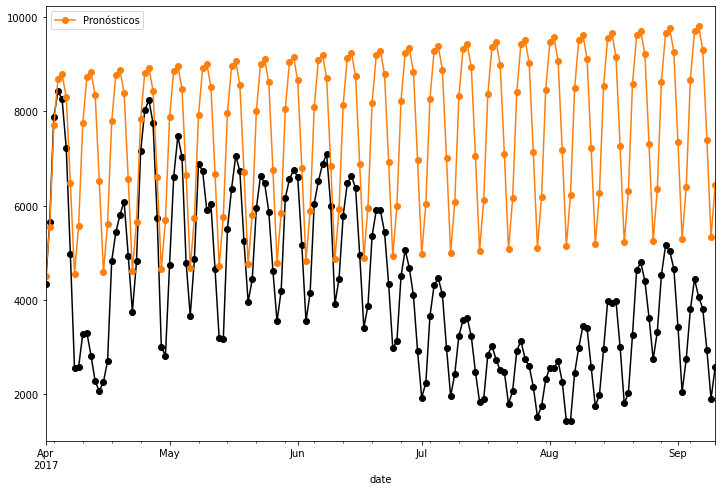

In [60]:
#Volviendo a la escala original
from scipy.special import boxcox, inv_boxcox
fcastr = inv_boxcox(fcast1, 0.57282)
orig = ts[640:803]
ax = orig.plot(color="black", marker="o", figsize=(12,8))
fcastr.plot(ax=ax, color='tab:orange', marker="o", legend=True)

Podemos observar que los pronósticos no son muy exactos, esto puede tener como justificación la tendencia de la serie, pues se pudo observar que está tendencia no era muy marcada, la pendiente de la recta que la explica no es muy significativa. Por experiencia sabemos que el modelo de suaviuzamiento ezponencial presenta  máxima eficacia se obtiene cuando los valores de las series temporales siguen una tendencia gradual y presentan un comportamiento estacional en el cual los valores siguen un patrón cíclico repetido a lo largo de un número determinado de periodos de tiempo.

## Modelo 2: Redes Neuronales

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel("pitagoras.xlsx")

In [3]:

df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']
df = df.sort_index(ascending=True, axis=0)
data = pd.DataFrame(df[['date', 'views']])
#

data.index = data.date
data.drop('date', axis=1, inplace=True)
data.head()

,views
date,
2015-07-01,4701
2015-07-02,6333
2015-07-03,3625
2015-07-04,2133
2015-07-05,2530


Actualmente solo tenemos una columna (el número de visitas a la página del teórema de Pitagoras de Wikipedia). Para entrenar la red neuronal, se decide usar los 24 valores pasados como entradas adicionales. Para esto se construye la siguiente función.

In [6]:
def create_regressor_attributes(df, attribute, list_of_prev_t_instants) :
            
    list_of_prev_t_instants.sort()
    start = list_of_prev_t_instants[-1] 
    end = len(df)
    df['datetime'] = df.index
    df.reset_index(drop=True)

    df_copy = df[start:end]
    df_copy.reset_index(inplace=True, drop=True)

    for attribute in attribute :
            foobar = pd.DataFrame()

            for prev_t in list_of_prev_t_instants :
                new_col = pd.DataFrame(df[attribute].iloc[(start - prev_t) : (end - prev_t)])
                new_col.reset_index(drop=True, inplace=True)
                new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)
                foobar = pd.concat([foobar, new_col], sort=False, axis=1)

            df_copy = pd.concat([df_copy, foobar], sort=False, axis=1)
            
    df_copy.set_index(['datetime'], drop=True, inplace=True)
    return df_copy

In [7]:
list_of_attributes = ['views']

list_of_prev_t_instants = []
for i in range(1,25):
    list_of_prev_t_instants.append(i)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [8]:
df_new = create_regressor_attributes(data, list_of_attributes, list_of_prev_t_instants)
df_new.head()

,views,views_(t-1),views_(t-2),views_(t-3),views_(t-4),views_(t-5),views_(t-6),views_(t-7),views_(t-8),views_(t-9),views_(t-10),views_(t-11),views_(t-12),views_(t-13),views_(t-14),views_(t-15),views_(t-16),views_(t-17),views_(t-18),views_(t-19),views_(t-20),views_(t-21),views_(t-22),views_(t-23),views_(t-24)
datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-25,1578,2353,3003,3460,3504,3149,1886,1891,2775,3470,3822,3656,3415,2495,2283,3308,4048,4617,4507,3866,2530,2133,3625,6333,4701
2015-07-26,1960,1578,2353,3003,3460,3504,3149,1886,1891,2775,3470,3822,3656,3415,2495,2283,3308,4048,4617,4507,3866,2530,2133,3625,6333
2015-07-27,2815,1960,1578,2353,3003,3460,3504,3149,1886,1891,2775,3470,3822,3656,3415,2495,2283,3308,4048,4617,4507,3866,2530,2133,3625
2015-07-28,3220,2815,1960,1578,2353,3003,3460,3504,3149,1886,1891,2775,3470,3822,3656,3415,2495,2283,3308,4048,4617,4507,3866,2530,2133
2015-07-29,2890,3220,2815,1960,1578,2353,3003,3460,3504,3149,1886,1891,2775,3470,3822,3656,3415,2495,2283,3308,4048,4617,4507,3866,2530


Tras obtener los retardos se dividen los datos entre los datos de entrenamiento, de validación y de prueba.

In [130]:
test_set_size = 0.094
valid_set_size= 0.094

df_copy = df_new.reset_index(drop=True)

df_test = df_copy.iloc[ int(np.floor(len(df_copy)*(1-test_set_size)))+1 : ]
df_train_plus_valid = df_copy.iloc[ : int(np.floor(len(df_copy)*(1-test_set_size)))+1 ]

df_train = df_train_plus_valid.iloc[ : int(np.floor(len(df_train_plus_valid)*(1-valid_set_size)))+1 ]
df_valid = df_train_plus_valid.iloc[ int(np.floor(len(df_train_plus_valid)*(1-valid_set_size)))+1 : ]


X_train, y_train = df_train.iloc[:, 1:], df_train.iloc[:, 0]
X_valid, y_valid = df_valid.iloc[:, 1:], df_valid.iloc[:, 0]
X_test, y_test = df_test.iloc[:, 1:], df_test.iloc[:, 0]

print('Shape of training inputs, training target:', X_train.shape, y_train.shape)
print('Shape of validation inputs, validation target:', X_valid.shape, y_valid.shape)
print('Shape of test inputs, test target:', X_test.shape, y_test.shape)

Shape of training inputs, training target: (640, 24) (640,)
Shape of validation inputs, validation target: (66, 24) (66,)
Shape of test inputs, test target: (73, 24) (73,)


Se normalizan los datos en el rango (0.01, 0.99) como ultimo paso antes de crear la red neuronal.

In [85]:
from sklearn.preprocessing import MinMaxScaler

Target_scaler = MinMaxScaler(feature_range=(0.01, 0.99))
Feature_scaler = MinMaxScaler(feature_range=(0.01, 0.99))

X_train_scaled = Feature_scaler.fit_transform(np.array(X_train))
X_valid_scaled = Feature_scaler.fit_transform(np.array(X_valid))
X_test_scaled = Feature_scaler.fit_transform(np.array(X_test))

y_train_scaled = Target_scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_valid_scaled = Target_scaler.fit_transform(np.array(y_valid).reshape(-1,1))
y_test_scaled = Target_scaler.fit_transform(np.array(y_test).reshape(-1,1))

Se decide usar funciones de activación lineales porque al tenerse tan pocos datos otras funciones de activación exponen al modelo a un sobre-ajuste.

In [109]:
input_layer = Input(shape=(24), dtype='float32')
dense1 = Dense(4, activation='linear')(input_layer)
#dropout_layer1 = Dropout(0.1)(dense1)
#dense2 = Dense(2, activation='relu')(dropout_layer1)
#dropout_layer2 = Dropout(0.1)(dense2)
#output_layer = Dense(1, activation='relu')(dropout_layer1)
output_layer = Dense(1, activation='linear')(dense1)

In [110]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 24)]              0         
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 100       
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 5         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [111]:
tf.random.set_seed(100)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
history = model.fit(x=X_train_scaled, y=y_train_scaled, batch_size=20, epochs=50, validation_data=(X_valid_scaled, y_valid_scaled))

Epoch 1/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2732 - val_loss: 0.2536
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0656 - val_loss: 0.1490
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.1291
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0449 - val_loss: 0.1095
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0386 - val_loss: 0.0931
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 0.0768
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.0679
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0561
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.0488
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0419
Epoch 11/50
32/32 [

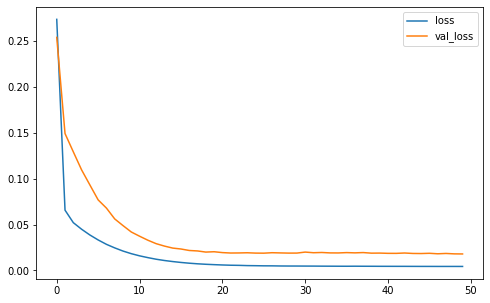

In [112]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [113]:
y_pred = model.predict(X_test_scaled)

In [114]:
y_pred_rescaled = Target_scaler.inverse_transform(y_pred)

Se usa el puntaje $R^2$ para determinar la calidad del modelo y se evaluan las predicciones

In [131]:
from sklearn.metrics import r2_score
y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
score = r2_score(y_test_rescaled, y_pred_rescaled)
print('R^2:', round(score,4))

R^2: 0.8393


In [116]:
y_actual = pd.DataFrame(y_test_rescaled, columns=['Actual'])

y_hat = pd.DataFrame(y_pred_rescaled, columns=['Predicted'])

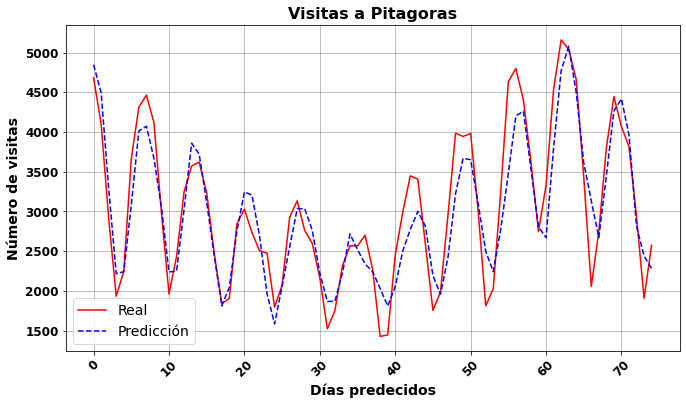

In [122]:
plt.figure(figsize=(11, 6))
plt.plot(y_actual, linestyle='solid', color='r')
plt.plot(y_hat, linestyle='dashed', color='b')

plt.legend(['Real','Predicción'], loc='best', prop={'size': 14})
plt.title('Visitas a Pitagoras', weight='bold', fontsize=16)
plt.ylabel('Número de visitas', weight='bold', fontsize=14)
plt.xlabel('Días predecidos', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'gray', linewidth='0.5')
plt.show()

Finalmente obteniendo un muy buen ajuste en los datos de prueba, por lo que se considera un buen modelo al momento de realizar la predicción.

In [119]:
mse_test=model.evaluate(X_valid_scaled, y_valid_scaled)
print(mse_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0180
0.01796874590218067


## Modelo 3: ARIMA

A continuación se ajustará un modelo SARIMA, la división de los datos de entrenamiento y validación son los mismos que el anterior modelo. La serie está transformada con la transformación de Box-Cox con $\lambda = 0.6422$ como se vió anteriormente. 

### Raiz unitaria
En primer lugar, haremos la prueba de Dickey-Fuller para verificar si hay presencia de una raiz unitaria, es decir, si los datos presentan tendencia.

In [22]:
from statsmodels.tsa.stattools import adfuller
resultadoadf=adfuller(logts,regression="nc", maxlag=7)####maxlag es importante
##Se debe elegir un lagmax grande y ver si el valor t de el último coeficiente de la variable
###Diferenciada es significativo(>1.6 en valor absoluto), si así lo es se lleva a cabo el test de Dickey Fuller
###Si no lo es, hay que reducir el rezago.
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

adfstat, pvalue, critvalues, resstore=adfuller(logts,regression="nc",maxlag=7,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()
pvalue
  
###Al no rechazarse la hipótesis nula implica que existe raíz unitaria.

ADF Statistic: -0.457424
P-value: 0.513537
	1%: -2.569
	5%: -1.941
	10%: -1.616


0.513537108246241

Se concluye que hay raiz unitaria, entonces diferenciamos para eliminar la tendencia.

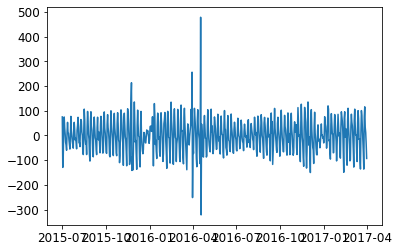

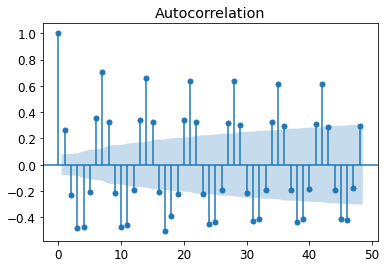

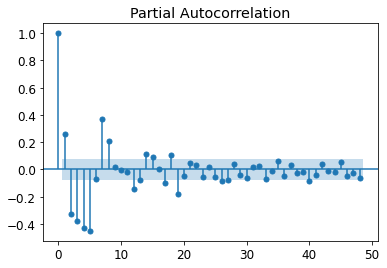

In [23]:
logdiff_1 = logts.diff(periods=1)[1:]
plt.plot(logdiff_1)
###Ahora procedemos a ajustar un modelo ARMA a la serie diferenciada
a=plot_acf(logdiff_1,lags=48, adjusted=False)
b=plot_pacf(logdiff_1,lags=48,method='ldbiased')

Se hace nuevamente la prueba con los serie diferenciada para verificar si hay otra raiz unitaria.

In [24]:
resultadoadf=adfuller(logdiff_1,regression="nc",maxlag=7)####maxlag es importante
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))
    
adfstat, pvalue, critvalues, resstore=adfuller(logdiff_1,regression="nc",maxlag=7,store=True,regresults=True)####maxlag es importante
pvalue
resstore.resols.summary()

ADF Statistic: -7.793660
P-value: 0.000000
	1%: -2.569
	5%: -1.941
	10%: -1.616


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.748
Method:                 Least Squares   F-statistic:                              235.0
Date:                Wed, 14 Jul 2021   Prob (F-statistic):                   1.57e-182
Time:                        12:22:26   Log-Likelihood:                         -3239.1
No. Observations:                 631   AIC:                                      6494.
Df Residuals:                     623   BIC:                                      6530.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.4354      0.184     -7.794      0.000      -1.797      -1.074
x2             0.2067      0.173      1.197      0.232      -0.132       0.546
x3            -0.0417      0.152     -0.275      0.783      -0.340       0.256
x4            -0.2420      0.126     -1.927      0.054      -0.489       0.005
x5            -0.4509      0.101     -4.466      0.000      -0.649      -0.253
x6            -0.6926      0.078     -8.937      0.000      -0.845      -0.540
x7            -0.6440      0.057    -11.240      0.000      -0.757      -0.532
x8            -0.2229      0.039     -5.719      0.000      -0.299      -0.146
==============================================================================
Omnibus:                      359.378   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24365.464
Skew:                           1.699   Prob(JB):                         0.00
Kurtosis:                      33.252   Cond. No.                         22.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No hay más raices unitarias, por lo tanto, a continuación ajustamos un modelo ARIMA. Graficamos la autocorrelación y la autocorrelación parcial para asignar los ordenes de p y q.

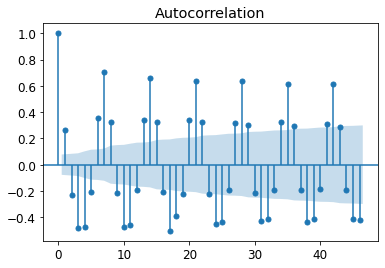

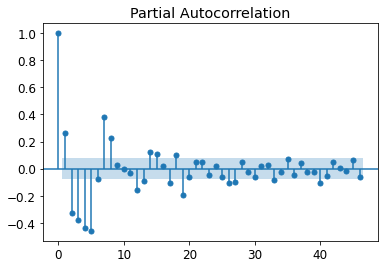

In [25]:
acfplot=plot_acf(logdiff_1,lags=46, adjusted=False)
pacfplot=plot_pacf(logdiff_1,lags=46)

### Componente Estacional
Como se vió en la parte descriptiva la serie tiene al menos un ciclo, por lo tanto se considera relevante incluir una componente estacional en el modelo final. A continuación se descrubrirá el periodo del ciclo. Por la presencia de una raiz unitaria se trabaja con la serie diferenciada.

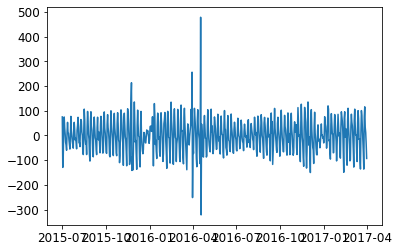

In [29]:
import seaborn
plt.plot(logdiff_1)

El gráfico de boxplot por meses de la serie y el periodograma nos indican que hay un ciclo de periodo 7 en la serie.

Text(0, 0.5, 'views')

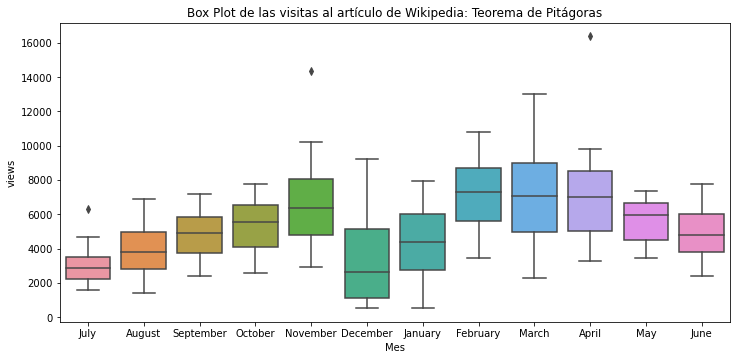

In [7]:
# graficos 
plt.figure(figsize=(12, 5.5))
g = sns.boxplot(data=df, y='views', x='mes')
g.set_title('Box Plot de las visitas al artículo de Wikipedia: Teorema de Pitágoras')
g.set_xlabel('Mes')
g.set_ylabel('views')


115
0.1432129514321295


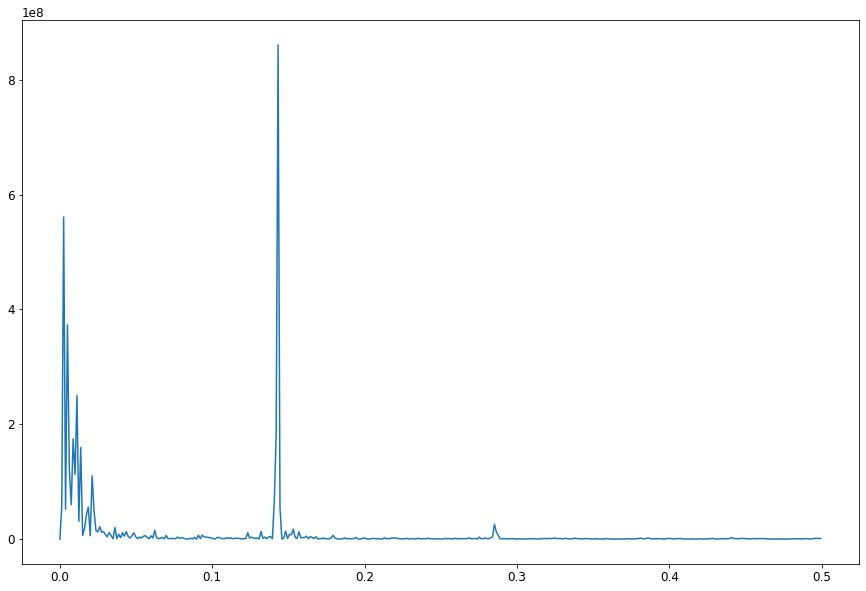

In [24]:
f, Pxx_den=sp.signal.periodogram(ts)
plt.plot(f, Pxx_den)
max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)

Por lo tanto diferenciamos nuevamente la serie pero en este caso para 7 rezagos, con el fin de verificar si esto elimina la componente cíclica.

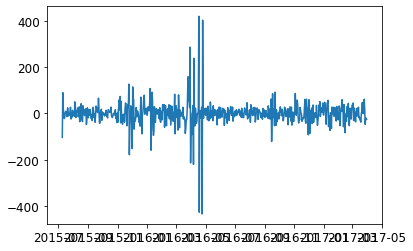

In [35]:
diff_7logdiff_1=logdiff_1.diff(periods=7)[7:]
plt.plot(diff_7logdiff_1)

C:\Users\sanch\anaconda3\envs\series\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='logvi'>

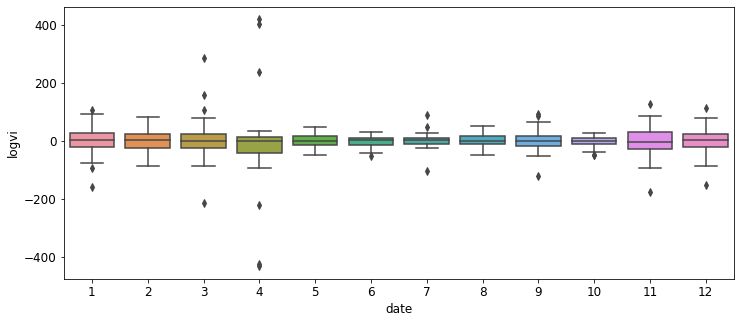

In [38]:
ig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(diff_7logdiff_1.index.month, diff_7logdiff_1, ax=ax)

Verificamos que no hay ciclo, luego se buscan los ordenes de p, q, P, y Q para ajustar un modelo SARIMA.

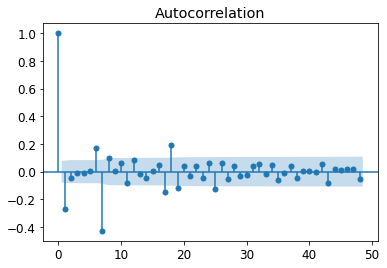

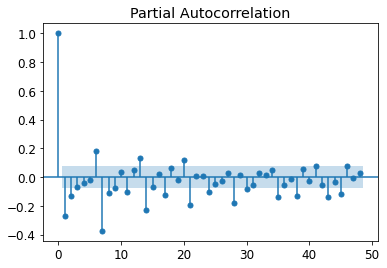

In [40]:
#acf(diff_1,nlags=20,unbiased=False)
acfplot=plot_acf(diff_7logdiff_1,lags=48, adjusted=False)
#pacf(diff_1,nlags=20)
pacfplot=plot_pacf(diff_7logdiff_1,lags=48)
###q=6,p=6
###Q=1 , P=4

### Modelo SARIMA
Teniendo en cuenta la presencia de la raiz unitaria, de la componente estacional y los anteriores gráficos se escoge el modelo SARIMA(2,1,4)x(3,1,1)7.

In [10]:
modelofinal = smapi.tsa.statespace.SARIMAX(logts, trend='n', order=(2,1,4), seasonal_order=(3,1,1,7))  
results_final = modelofinal.fit()###Dentro de los parentesis use_boxcox=False
print(results_final.summary())

C:\Users\sanch\anaconda3\envs\series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\sanch\anaconda3\envs\series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\sanch\anaconda3\envs\series\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                               logvi   No. Observations:                  640
Model:             SARIMAX(2, 1, 4)x(3, 1, [1], 7)   Log Likelihood               -3198.426
Date:                             Thu, 15 Jul 2021   AIC                           6418.851
Time:                                     10:52:02   BIC                           6467.789
Sample:                                 07-01-2015   HQIC                          6437.857
                                      - 03-31-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3469      0.056      6.149      0.000       0.236       0.457
ar.L2         -0.9551      

### Verificación de supuestos
Podemos ver en los gráficos de autocorrelación que los errores estandarizados son no autocorrelacionados, esto cumple el supuesto de no autocorrelación. 

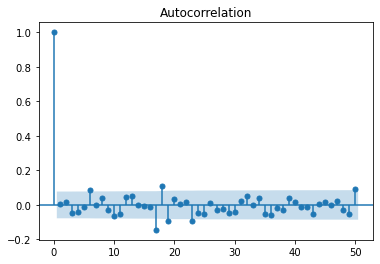

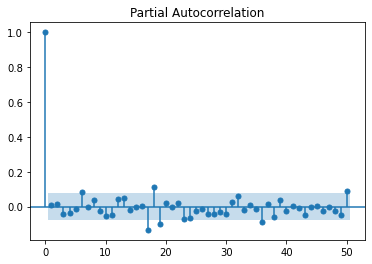

In [11]:
#results_final.standardized_forecasts_error.reshape(144,)
fig1=plot_acf(results_final.standardized_forecasts_error.reshape(640,),lags=50,adjusted=False)
fig2=plot_pacf(results_final.standardized_forecasts_error.reshape(640,),lags=50,method='ldbiased')


Al graficar los residuales vemos que tienen media cero, sin tendencia, ni ciclos. Luego, se cumple el supuesto de que son un proceso estacionario de media cero.

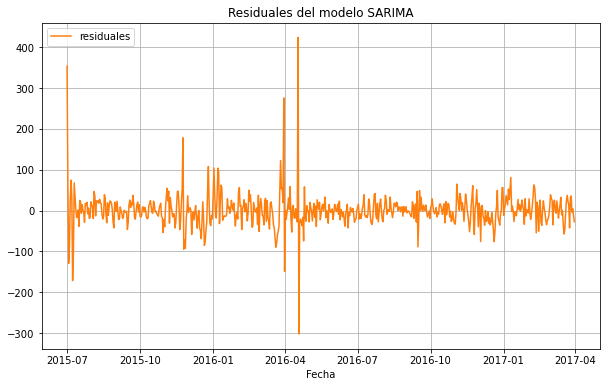

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(residuales, '-', label="residuales", color='tab:orange')
ax.set_xlabel('Fecha')
ax.set_title('Residuales del modelo SARIMA')
ax.grid(True)
ax.legend(loc='upper left');

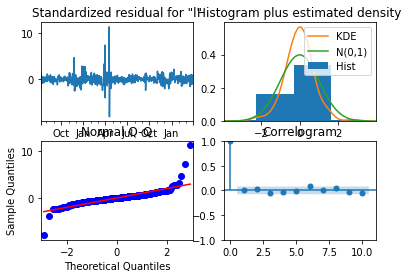

In [17]:
residuales=results_final.resid####Residuales no estandarizados

graf_resid=results_final.plot_diagnostics()


Se verifica el supuesto de no heterocedasticidad y como el valor p de la prueba es de 0.008 se rechaza $H_0:$ los errores son heterocedasticos al 95%

In [13]:
## Hipótesis nula de no heterocedasticidad
results_final.test_heteroskedasticity(method='breakvar') #[Est. de prueba, p-valor]


array([[0.6920731 , 0.00775438]])

Se verifica el supuesto de que el proceso sea gaussiano y como el valor p de la prueba es 0 se rechaza  $H_0$:  la distribución es gaussiana al 95%

In [14]:
## Hipótesis nula de normalidad
results_final.test_normality(method='jarquebera')
#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada


array([[3.42354369e+04, 0.00000000e+00, 2.11409608e+00, 3.88078521e+01]])

### Prueba del modelo
Con el conjunto de prueba de los datos se va a testear el poder predictivo del modelo.

In [26]:
data = pd.ExcelFile('pitagoras.xlsx')
print(data.sheet_names)

['train', 'test']


<ipython-input-26-8c8d52c398de>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  data = pd.ExcelFile('pitagoras.xlsx')


In [27]:
df = data.parse('test')

print(df)
type(df)

          date  views
0   2017-04-01   4340
1   2017-04-02   5651
2   2017-04-03   7883
3   2017-04-04   8428
4   2017-04-05   8254
..         ...    ...
158 2017-09-06   4069
159 2017-09-07   3816
160 2017-09-08   2936
161 2017-09-09   1906
162 2017-09-10   2575

[163 rows x 2 columns]


pandas.core.frame.DataFrame

In [28]:
#Convertir el conjunto de datos en una serie de tiempo
df['date'] = pd.to_datetime(df['date'])
indice = df.set_index('date')
ts_test = indice['views']
#Establecer frecuencia del índice
indice.index.freq='D'
ts_test.index.freq='D'
print(ts_test)

date
2017-04-01    4340
2017-04-02    5651
2017-04-03    7883
2017-04-04    8428
2017-04-05    8254
              ... 
2017-09-06    4069
2017-09-07    3816
2017-09-08    2936
2017-09-09    1906
2017-09-10    2575
Freq: D, Name: views, Length: 163, dtype: int64


In [29]:
####Etapa de pronósticos
pronosticos=results_final.forecast(steps=163)

#salforecast=results_final.get_prediction(start=131, end=142,full_results=True,alpha=0.05,dynamic=False)
#salforecast.conf_int(alpha=0.05)

salforecastotro=results_final.get_forecast(steps=163)
ICforecast95=salforecastotro.conf_int(alpha=0.05)
pronosticos=salforecastotro.predicted_mean

###Reescalar#####
pronosticos_inboxcox=sp.special.inv_boxcox(np.array(pronosticos[0:]),0.6422)
ICinfforecast95_invbox=sp.special.inv_boxcox(np.array(ICforecast95.iloc[:,0]),0.6422)
ICsupforecast95_invbox=sp.special.inv_boxcox(np.array(ICforecast95.iloc[:,1]),0.6422)
pronosticos_inboxcox_test=pd.Series(pronosticos_inboxcox,index=pronosticos.index)


In [30]:
ecm = ts_test - pronosticos_inboxcox_test
print(ecm)

date
2017-04-01    -218.608516
2017-04-02      36.900417
2017-04-03     175.477436
2017-04-04    -299.894355
2017-04-05    -593.704229
                 ...     
2017-09-06   -5630.633057
2017-09-07   -5330.620141
2017-09-08   -4514.391515
2017-09-09   -3686.254940
2017-09-10   -3911.600216
Freq: D, Length: 163, dtype: float64


In [31]:
import statistics as stats
stats.mean((ts_test - pronosticos_inboxcox_test)**2)

14228630.398151252

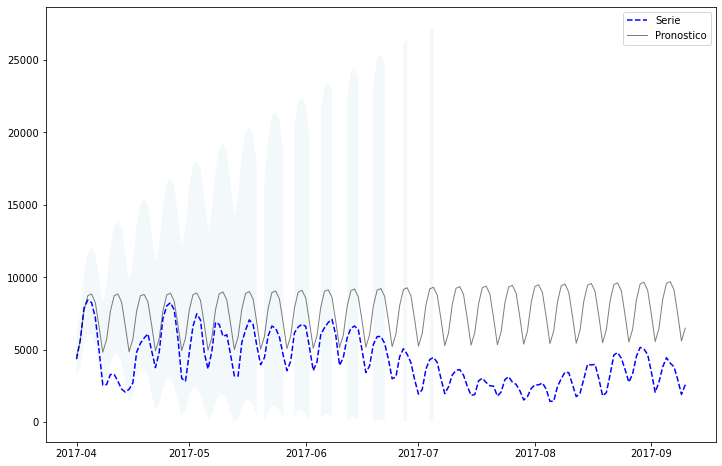

In [32]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(ts_test.astype('float64'), '--', color="blue", label='Serie')
# Pronóstico
ax.plot(pronosticos_inboxcox_test, lw=1, color="black", alpha=0.5, label='Pronostico')
ax.fill_between(pronosticos.index, ICinfforecast95_invbox, ICsupforecast95_invbox, alpha=0.05)
ax.legend(loc='upper right')
plt.draw()

En los primeros rezagos la serie predice bien el comportamiento de las visitas al artículo de Wikipedia, pero por la componente cíclica mensual que no se observó por el tamaño reducido del conjunto total de datos las predicciones a partir de 2017-07 son pésimas.

### Analisis de outliers
Conectamos R para hacer los análisis apropiados.

In [10]:
from platform import python_version
print(python_version())
import pandas as pd


3.8.8


In [11]:
import rpy2
print(rpy2.__version__)

3.4.3


In [12]:
import os
os.environ['R_HOME'] = "C:/PROGRA~1/R/R-36~1.3"
#os.environ['R_HOME'] = '/opt/anaconda3/lib/R'
import rpy2.situation
for row in rpy2.situation.iter_info():
    print(row)
    
# para obtener esta ruta "/Library/Frameworks/R.framework/Resources", debemos ejectuar en r la siguiente instrucción: R.home(component = "home")
#Yo usaré R que está instaldo en mi equipo y esto me sirve en el sistema operativo MACos con estas version de R y Python.


rpy2 version:
3.4.3
Python version:
3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
Looking for R's HOME:
    Environment variable R_HOME: C:/PROGRA~1/R/R-36~1.3
    InstallPath in the registry: C:\Program Files\R\R-3.6.3
    Environment variable R_USER: None
    Environment variable R_LIBS_USER: None
R version:
    In the PATH: 
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:


In [13]:
import rpy2.robjects as robjects
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Cargamos los datos y las librerias necesarias de R.

In [14]:
%%R
library(readxl)
pitagoras <- read_excel("C:/Users/sanch/Downloads/pitagoras.xlsx", 
                        sheet = "train")


R[write to console]: 
R[write to console]: -
R[write to console]: 
R[write to console]: /
                                                                              
R[write to console]: 


Ajustamos el modelo SARIMA(2,1,4)x(3,1,1)7 con la transformación Box-Cox según vimos anteriormente.

In [16]:
%%R
library(xts)
library(forecast)
library(tidyverse)
library(TSstudio)

ts <- as.ts(pitagoras$views)
logts <- (ts^0.6422 - 1)/0.6422
ajuste=Arima(logts,order=c(2,1,4),seasonal = list(order = c(3, 1, 1), period = 7),include.mean=T,lambda =0 )


R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: 
Attaching package: 'forecast'


R[write to console]: The following object is masked from 'package:FitAR':

    BoxCox




Buscamos los outliers con un valor $c=7.8$, para valores más bajos arroja demasiados outliers ya que no se capturó la componente cíclica mensual por la cantidad reducida de observaciones. 

In [17]:
%%R
library(tsoutliers)

resi= residuals(ajuste)
coef= coefs2poly(ajuste)
outliers= locate.outliers(resi,coef, cval = 7.8)
outliers


  type ind    coefhat      tstat
1   AO 274  0.4469617  11.859086
2   AO 291 -0.3972760 -10.540790
3   AO 292  0.7634752  20.257032
5   LS 179  0.4318944   8.579341
6   LS 186  0.4820068   9.574796
9   LS 293 -0.6596809 -13.104194


Ajustamos nuevamente el modelo SARIMA(2,1,4)x(3,1,1)7 pero con la componente de los outliers.

In [18]:
%%R
n=length(logts)
xreg = outliers.effects(outliers,n )

analisis=Arima(logts,order=c(2,1,4),seasonal = list(order = c(3, 1, 1), period=7),include.mean=T,lambda =0 ,xreg=xreg)
analisis


Series: logts 
Regression with ARIMA(2,1,4)(3,1,1)[7] errors 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ar2      ma1     ma2     ma3     ma4    sar1     sar2
      1.0913  -0.3086  -0.9925  0.1766  0.0917  0.0426  0.0703  -0.0059
s.e.  0.3794   0.2670   0.3777  0.2376  0.0777  0.0659  0.0521   0.0428
         sar3     sma1   AO274    AO291   AO292   LS179   LS186   LS293
      -0.0038  -1.0000  0.4459  -0.0299  0.7786  0.5370  0.5643  0.0066
s.e.   0.0434   0.0222  0.0463   0.0698  0.1003  0.0738  0.0720  0.1231

sigma^2 estimated as 0.004771:  log likelihood=785.27
AIC=-1536.54   AICc=-1535.54   BIC=-1460.9


Y nuevamente buscamos outliers restantes, como no hay podemos continuar con la verificación de supuestos.

In [19]:
%%R
resi_analisis= residuals(analisis)
coef_analisis= coefs2poly(analisis)
outliers_analisis= locate.outliers(resi_analisis,coef_analisis, cval = 7.8)
outliers_analisis


[1] type    ind     coefhat tstat  
<0 rows> (or 0-length row.names)


#### Verificación de supuestos
Podemos ver que los residuales de este modelo tienen media cero, sin tendencia, ni ciclos. Luego, se cumple el supuesto de que son un proceso estacionario de media cero.

Además, los gráficos de autocorrelación y autocorrelación parcial muestran que los errores son no autocorrelacionados, por lo tanto se cumple el supuesto.

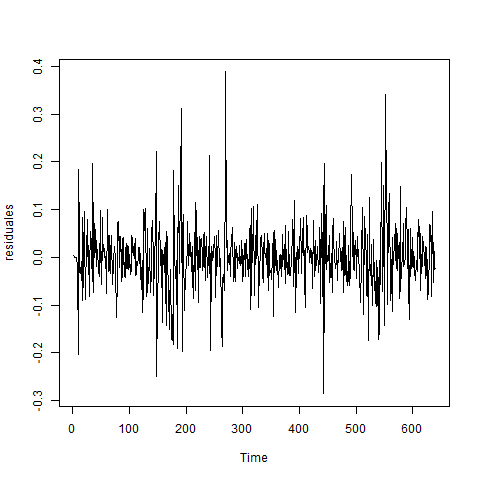

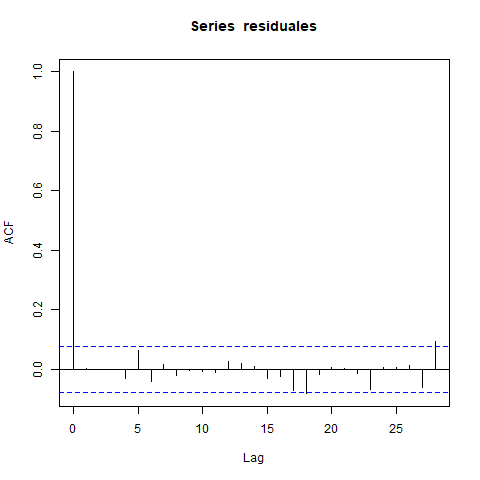

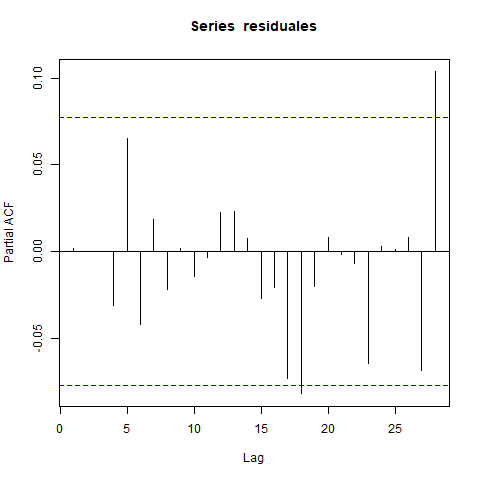

In [21]:
%%R
## Análisis de residuales
#x11()
residuales <- analisis$residuals
plot(residuales)
acf(residuales)
pacf(residuales)


Se verifica el supuesto de que el proceso sea gaussiano y como el valor p de la prueba es 0 se rechaza  𝐻0 : la distribución es gaussiana al 95%

In [25]:
%%R
#Test de normalidad
JarqueBera.test(residuales)



	Jarque Bera Test

data:  residuales
X-squared = 530.68, df = 2, p-value < 2.2e-16


	Skewness

data:  residuales
statistic = 0.47886, p-value = 7.591e-07


	Kurtosis

data:  residuales
statistic = 7.357, p-value < 2.2e-16



Se verifica el supuesto de que el proceso no es autocorrelacionado y como el valor p de la prueba es 0.6219 no se rechaza 𝐻0 : el proceso no es autocorrelacionado al 95%

In [26]:
%%R
#Test de autocorrelaci?n
Box.test(residuales, lag = (length(residuales)/4), type = "Ljung-Box", fitdf = 2)



	Box-Ljung test

data:  residuales
X-squared = 151.89, df = 158, p-value = 0.6219



Verificamos las estadísticas CUSUM y podemos ver que ambas están bien, dentro de las bandas.

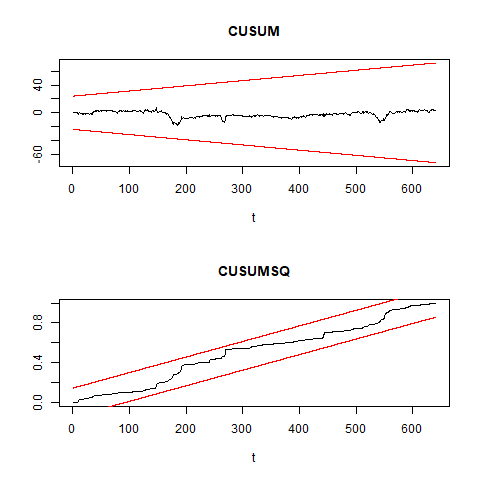

In [27]:
%%R
###Estad?ticas CUSUM
res=residuales
cum=cumsum(res)/sd(res)
N=length(res)
cumq=cumsum(res^2)/sum(res^2)
Af=0.948 ###Cuantil del 95% para la estad?stica cusum
co=0.14422####Valor del cuantil aproximado para cusumsq para n/2
LS=Af*sqrt(N)+2*Af*c(1:length(res))/sqrt(N)
LI=-LS
LQS=co+(1:length(res))/N
LQI=-co+(1:length(res))/N
par(mfrow=c(2,1))
plot(cum,type="l",ylim=c(min(LI),max(LS)),xlab="t",ylab="",main="CUSUM")
lines(LS,type="S",col="red")
lines(LI,type="S",col="red")
#CUSUM Square
plot(cumq,type="l",xlab="t",ylab="",main="CUSUMSQ")                      
lines(LQS,type="S",col="red")                                                                           
lines(LQI,type="S",col="red")


Hacemos algunos pronósticos 12 pasos adelante, teniendo en cuenta los outliers.

In [29]:
%%R
pasos_adel=12
num_outliers=dim(outliers)[2]
regresoras_aditivos=matrix(c(rep(0,pasos_adel*(num_outliers-1))),pasos_adel,num_outliers-1)
regresoras_LS=matrix(c(rep(1,pasos_adel)),pasos_adel,3)
regresoras=cbind(regresoras_aditivos,regresoras_LS)
colnames(regresoras)=colnames(xreg)

pronostico_out=forecast(object=analisis,xreg=regresoras,h=pasos_adel) 
pronostico_out


    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
641       324.0127 296.4215 354.1721 282.7798 371.2578
642       367.7911 322.2359 419.7864 300.4511 450.2239
643       475.4366 403.8476 559.7159 370.4235 610.2203
644       523.1009 432.2609 633.0311 390.7449 700.2896
645       522.7697 420.1607 650.4373 374.2665 730.1967
646       495.6714 387.3687 634.2541 339.9738 722.6739
647       413.7268 314.5036 544.2539 272.0097 629.2785
648       315.0543 232.4574 426.9997 197.8994 501.5641
649       355.6836 255.0641 495.9961 213.8952 591.4617
650       461.5346 322.2275 661.0677 266.4153 799.5570
651       511.7510 348.3481 751.8028 284.1745 921.5785
652       512.7183 340.6748 771.6451 274.3827 958.0782


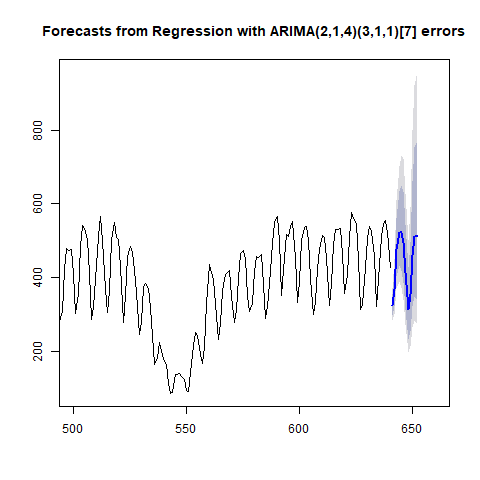

In [32]:
%%R
plot(pronostico_out, xlim=c(500,660))


#### Prueba del modelo 
Calculamos el ECM con los datos de prueba y los pronosticos del modelo SARIMA con outliers 

In [33]:
%%R

pasos_adel=163
num_outliers=dim(outliers)[2]
regresoras_aditivos=matrix(c(rep(0,pasos_adel*(num_outliers-1))),pasos_adel,num_outliers-1)
regresoras_LS=matrix(c(rep(1,pasos_adel)),pasos_adel,3)
regresoras=cbind(regresoras_aditivos,regresoras_LS)
colnames(regresoras)=colnames(xreg)

pronostico_out=forecast(object=analisis,xreg=regresoras,h=pasos_adel) 
val_test <- read_excel("C:/Users/sanch/Downloads/pitagoras.xlsx", 
                        sheet = "test")
mean((pronostico_out$mean - val_test$views)^2)


R[write to console]: 
R[write to console]: -
R[write to console]: 
R[write to console]: /
                                                                              
R[write to console]: 


[1] 17469700


## Conclusiones
1. Del análisis descriptivo podemos identificar que la serie de tiempo del número de visitas al artículo de Wikipedia Teorema de Pitágoras no es estacionaria, tiene un ciclo semanal y la varianza marginal no es constante.
2. El mejor modelo en términos de predicción es el modelo de redes neuronales, pues el error cuadratico medio con el conjunto de prueba fue el menor.